# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
!pip list

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 3. Loading and prperocessing video data

In [4]:
import os
import numpy as np
import tensorflow as tf
import random
import cv2


# Function to extract frames from a video file
def frames_from_video_file(video_path, n_frames, frame_size=(256, 256)):
    cap = cv2.VideoCapture(video_path)
    frames = []
    
    # Read all frames first
    frame_list = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, frame_size)
        frame_list.append(frame)
    
    cap.release()

    # Generate sequences of n_frames
    for start in range(len(frame_list) - n_frames + 1):
        sequence = frame_list[start:start + n_frames]
        frames.append(np.array(sequence))

    return np.array(frames)

class FrameGenerator:
    def __init__(self, path, n_frames, training=False):
        self.path = path
        self.n_frames = n_frames
        self.training = training
        self.class_names = sorted(os.listdir(self.path))  # Directories are class names
        self.class_ids_for_name = {name: idx for idx, name in enumerate(self.class_names)}

    def get_files_and_class_names(self):
        video_paths = []
        for class_name in self.class_names:
            class_path = os.path.join(self.path, class_name)
            if os.path.isdir(class_path):
                for video_name in os.listdir(class_path):
                    video_paths.append(os.path.join(class_path, video_name))
        classes = [os.path.basename(os.path.dirname(p)) for p in video_paths]
        return video_paths, classes

    def __call__(self):
        video_paths, classes = self.get_files_and_class_names()
        pairs = list(zip(video_paths, classes))

        if self.training:
            random.shuffle(pairs)

        for path, name in pairs:
            video_frames = frames_from_video_file(path, self.n_frames)
            if video_frames.shape[0] > 0:  # Ensure we have frames
                for frames in video_frames:  # Yield each sequence of frames
                    label = self.class_ids_for_name[name]  # Encode labels
                    yield frames, label

# Define your data directory
data_directory = '/kaggle/input/data-1000/data'  # Update this to your actual data directory

# Create a TensorFlow dataset from the FrameGenerator
output_signature = (tf.TensorSpec(shape=(16, 256, 256, 3), dtype=tf.float32),
                    tf.TensorSpec(shape=(), dtype=tf.int64))

train_ds = tf.data.Dataset.from_generator(FrameGenerator(data_directory, 16, training=True),
                                           output_signature=output_signature)



In [ ]:
'''#code for creating single 16 frame 
import os
import numpy as np
import tensorflow as tf
import random
import cv2

# Function to extract frames from a video file
def frames_from_video_file(video_path, n_frames, frame_size=(256, 256)):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while len(frames) < n_frames:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, frame_size)
        frames.append(frame)
    cap.release()
    return np.array(frames)

class FrameGenerator:
    def __init__(self, path, n_frames, training=False):
        self.path = path
        self.n_frames = n_frames
        self.training = training
        self.class_names = sorted(os.listdir(self.path))  # Directories are class names
        self.class_ids_for_name = {name: idx for idx, name in enumerate(self.class_names)}

    def get_files_and_class_names(self):
        video_paths = []
        for class_name in self.class_names:
            class_path = os.path.join(self.path, class_name)
            if os.path.isdir(class_path):
                for video_name in os.listdir(class_path):
                    video_paths.append(os.path.join(class_path, video_name))
        classes = [os.path.basename(os.path.dirname(p)) for p in video_paths]
        return video_paths, classes

    def __call__(self):
        video_paths, classes = self.get_files_and_class_names()
        pairs = list(zip(video_paths, classes))

        if self.training:
            random.shuffle(pairs)

        for path, name in pairs:
            video_frames = frames_from_video_file(path, self.n_frames)
            label = self.class_ids_for_name[name]  # Encode labels
            yield video_frames, label

# Define your data directory
data_directory = 'data'  # Update this to your actual data directory

# Create a TensorFlow dataset from the FrameGenerator
output_signature = (tf.TensorSpec(shape=(16, 256, 256, 3), dtype=tf.float32),
                    tf.TensorSpec(shape=(), dtype=tf.int64))

train_ds = tf.data.Dataset.from_generator(FrameGenerator(data_directory, 16, training=True),
                                           output_signature=output_signature)

'''

In [ ]:
'''data_iterator = train_ds.as_numpy_iterator()'''

In [ ]:
'''batch = data_iterator.next()'''

In [ ]:
'''batch[1].shape'''

In [ ]:
'''batch[0].shape'''

In [5]:
#for multipae frmes 
#data_iterator = train_ds.as_numpy_iterator()

data_iterator = train_ds.as_numpy_iterator()

# Iterate through the dataset
while True:
    try:
        batch = data_iterator.next()
        #print(f"Batch Shape: {batch[0].shape}")
        print(f" Labels: {batch[1]}")
    except StopIteration:
        print("End of dataset reached.")
        break



 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0
 Labels: 0

In [ ]:
'''import matplotlib.pyplot as plt

# Number of batches to visualize
num_batches = 4  # Adjust as needed

# Iterate through the dataset and visualize multiple batches
for _ in range(num_batches):
    video_frames, labels = next(train_ds.as_numpy_iterator())  # Get one batch

    # Plot the first frame from the batch
    fig, ax = plt.subplots(figsize=(5, 5))
    
    ax.imshow(video_frames[0].astype(int))  # Display the first frame
    ax.set_title(f'Label: {labels}')  # Show the label of the video
    ax.axis('off')  # Turn off axis

    plt.show()  # Display the plot
'''

In [ ]:
#for multipal 
import matplotlib.pyplot as plt

# Number of batches to visualize
num_batches = 4  # Adjust as needed

# Create a data iterator
data_iterator = train_ds.as_numpy_iterator()

# Iterate through the dataset and visualize multiple batches
for _ in range(num_batches):
    video_frames, labels = next(data_iterator)  # Get one batch

    # Plot the first frame from the batch
    fig, ax = plt.subplots(figsize=(5, 5))
    
    # Ensure we're plotting the first frame of the first sequence
    ax.imshow(video_frames[0].astype(int))  # Display the first frame
    ax.set_title(f'Label: {labels}')  # Show the label of the video
    ax.axis('off')  # Turn off axis

    plt.show()  # Display the plot


# 4. Scale Data

In [6]:
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))  # Normalize frames to [0, 1]


In [7]:
scaled = train_ds.as_numpy_iterator()

In [8]:
batch = scaled.next()

In [ ]:
import matplotlib.pyplot as plt

# Number of batches to visualize
num_batches = 4  # Adjust as needed

# Iterate through the dataset and visualize multiple batches
for _ in range(num_batches):
    video_frames, labels = next(train_ds.as_numpy_iterator())  # Get one batch

    # Plot the first frame from the batch
    fig, ax = plt.subplots(figsize=(5, 5))
    
    ax.imshow(video_frames[0])  # Display the first frame
    ax.set_title(f'Label: {labels}')  # Show the label of the video
    ax.axis('off')  # Turn off axis

    plt.show()  # Display the plot


In [9]:
batch[0].max()

0.9372549

# 5. Split Data

In [10]:
# Calculate dataset sizes
total_samples = sum(1 for _ in train_ds)
train_size = int(total_samples * 0.7)
val_size = int(total_samples * 0.2)
test_size = total_samples - train_size - val_size



# 6. Build Deep Learning Model

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [12]:

def resnet3d(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Initial Convolution
    x = layers.Conv3D(64, (3, 3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling3D((1, 2, 2))(x)

    # Adding multiple ResNet Blocks
    for _ in range(5):  # Each block has 3 conv layers
        skip = x
        x = layers.Conv3D(64, (3, 3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)

        x = layers.Conv3D(64, (3, 3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.add([x, skip])  # First Skip connection
        x = layers.ReLU()(x)

        skip = x  # Update skip for the next block
        x = layers.Conv3D(64, (3, 3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.add([x, skip])  # Second Skip connection
        x = layers.ReLU()(x)

        

    # Global Average Pooling and Dense layer
    x = layers.GlobalAveragePooling3D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model


In [13]:
# Define input shape and number of classes
input_shape = (16, 256, 256, 3)  # 16 frames of 256x256 RGB images
num_classes = 3  # Adjust based on your dataset

model = resnet3d(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 16, 256,   │          0 │ -                 │
│ (InputLayer)        │ 256, 3)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d (Conv3D)     │ (None, 16, 256,   │      5,248 │ input_layer[0][0] │
│                     │ 256, 64)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d       │ (None, 16, 128,   │          0 │ conv3d[0][0]      │
│ (MaxPooling3D)      │ 128, 64)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_1 (Conv3D)   │ (None, 16, 128,   │    110,656 │ max_pooling3d[0]… │
│                     │ 128, 64)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 16, 128,   │        256 │ conv3d_1[0][0]    │
│ (BatchNormalizatio… │ 128, 64)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 16, 128,   │          0 │ batch_normalizat… │
│                     │ 128, 64)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_2 (Conv3D)   │ (None, 16, 128,   │    110,656 │ re_lu[0][0]       │
│                     │ 128, 64)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 128,   │        256 │ conv3d_2[0][0]    │
│ (BatchNormalizatio… │ 128, 64)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 16, 128,   │          0 │ batch_normalizat… │
│                     │ 128, 64)          │            │ max_pooling3d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 16, 128,   │          0 │ add[0][0]         │
│                     │ 128, 64)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_3 (Conv3D)   │ (None, 16, 128,   │    110,656 │ re_lu_1[0][0]     │
│                     │ 128, 64)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 128,   │        256 │ conv3d_3[0][0]    │
│ (BatchNormalizatio… │ 128, 64)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 16, 128,   │          0 │ batch_normalizat… │
│                     │ 128, 64)          │            │ re_lu_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 16, 128,   │          0 │ add_1[0][0]       │
│                     │ 128, 64)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_4 (Conv3D)   │ (None, 16, 128,   │    110,656 │ re_lu_2[0][0]     │
│                     │ 128, 64)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 128,   │        256 │ conv3d_4[0][0]    │
│ (BatchNormalizatio… │ 128, 64)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 16, 128,   │          0 │ batch_normalizat

 Total params: 1,669,123 (6.37 MB)

 Trainable params: 1,667,203 (6.36 MB)

 Non-trainable params: 1,920 (7.50 KB)

# 7. Train

In [14]:
# Define the log directory for TensorBoard
logdir = 'logs'

In [15]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [16]:
# Define your batch size
batch_size = 4  # Set this based on your GPU memory limits

# Shuffle and split the dataset
shuffled_dataset = train_ds.shuffle(buffer_size=100)
train_dataset = shuffled_dataset.take(train_size).batch(batch_size)  # Add batch size
val_dataset = shuffled_dataset.skip(train_size).take(val_size).batch(batch_size)  # Add batch size
test_dataset = shuffled_dataset.skip(train_size + val_size).take(test_size).batch(batch_size)  # Add batch size

# Fit the model on the training dataset
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=4,
    callbacks=[tensorboard_callback],
    verbose=1
)


Epoch 1/4


I0000 00:00:1728564441.710516      98 service.cc:145] XLA service 0x782298a559f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728564441.710610      98 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
2024-10-10 12:47:30.211484: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,3,3,3,3]{4,3,2,1,0}, u8[0]{0}) custom-call(f32[4,3,16,256,256]{4,3,2,1,0}, f32[4,64,16,256,256]{4,3,2,1,0}), window={size=3x3x3 pad=1_1x1_1x1_1}, dim_labels=bf012_oi012->bf012, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-10-10 12:47:30.705681: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.494325019s
Trying algori

    605/Unknown 1636s 3s/step - accuracy: 0.9571 - loss: 0.1812

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


605/605 ━━━━━━━━━━━━━━━━━━━━ 1953s 3s/step - accuracy: 0.9571 - loss: 0.1811 - val_accuracy: 1.0000 - val_loss: 2.0733e-05
Epoch 2/4
605/605 ━━━━━━━━━━━━━━━━━━━━ 1908s 3s/step - accuracy: 0.9826 - loss: 0.0792 - val_accuracy: 0.1187 - val_loss: 20.0927
Epoch 3/4
605/605 ━━━━━━━━━━━━━━━━━━━━ 1899s 3s/step - accuracy: 0.9099 - loss: 0.4660 - val_accuracy: 0.8973 - val_loss: 2.3609
Epoch 4/4
605/605 ━━━━━━━━━━━━━━━━━━━━ 1922s 3s/step - accuracy: 0.9883 - loss: 0.0490 - val_accuracy: 0.0000e+00 - val_loss: 4.8744


# 8. Plot Performance

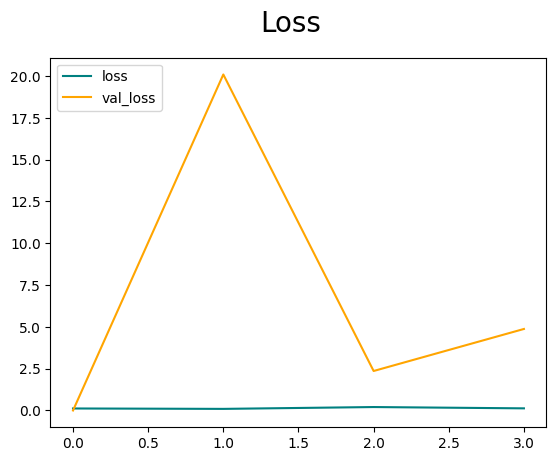

In [17]:
import matplotlib.pyplot as plt

# Plot loss
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

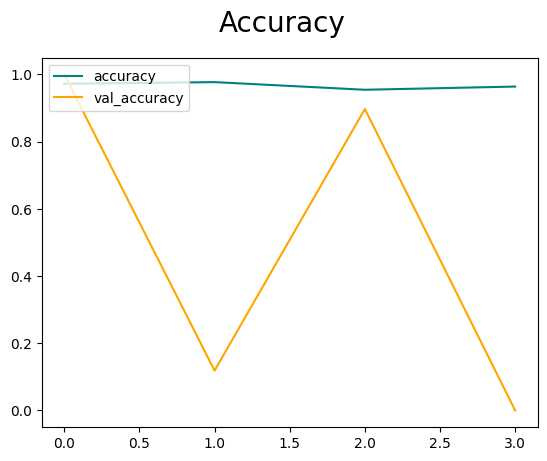

In [18]:
# Plot accuracy
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [19]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy

# Initialize metrics
pre = Precision()
re = Recall()
acc = SparseCategoricalAccuracy()

# Iterate through the test dataset
for batch in test_dataset.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)  # Make predictions

    # Ensure labels and predictions are of compatible shapes
    y_pred = tf.argmax(yhat, axis=-1)  # Convert predictions to class indices
    
    pre.update_state(y, y_pred)  # Update precision
    re.update_state(y, y_pred)   # Update recall
    acc.update_state(y, y_pred)  # Update accuracy

# Print results
print(f"Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━

# 10. Test

In [28]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to read and preprocess video
def preprocess_video(video_path, n_frames=16):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while len(frames) < n_frames:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (256, 256))
        frames.append(frame)
    cap.release()
    return np.array(frames)

# Load and preprocess the video
video_path = '/kaggle/input/andgry/angry.mp4'  # Update with your video path
video_frames = preprocess_video(video_path)

# Normalize and add a batch dimension
video_frames_normalized = video_frames / 255.0
yhat = model.predict(np.expand_dims(video_frames_normalized, axis=0))

# Assuming your model outputs probabilities for each class
predicted_class = np.argmax(yhat, axis=1)

# Display the result
if predicted_class == 0:
    print('Predicted class is Angry')
elif predicted_class == 1:
    print('Predicted class is Happy')
else:
    print('Predicted class is Sad')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted class is Angry


# 11. Save the Model

In [30]:
import os
from tensorflow.keras.models import load_model

# Save the model
model.save(os.path.join('models', 'resnet3d_model.h5'))

# Load the model
new_model = load_model(os.path.join('models', 'resnet3d_model.h5'))

# Example prediction with the new model
video_frames_normalized = video_frames / 255.0  # Ensure normalization
yhat = new_model.predict(np.expand_dims(video_frames_normalized, axis=0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step


In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# Function to read and preprocess video
def preprocess_video(video_path, n_frames=16):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while len(frames) < n_frames:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (256, 256))
        frames.append(frame)
    cap.release()
    return np.array(frames)

# Load and preprocess the video
video_path = 'datasets/istockphoto-1667643471-640_adpp_is.mp4'  # Update with your video path
video_frames = preprocess_video(video_path)

# Normalize and add a batch dimension
video_frames_normalized = video_frames / 255.0

# Load the saved model
model = load_model('models/resnet3d_model.h5')

# Perform predictions
yhat = model.predict(np.expand_dims(video_frames_normalized, axis=0))

# Assuming your model outputs probabilities for each class
predicted_class = np.argmax(yhat, axis=1)

# Display the result
if predicted_class == 0:
    print('Predicted class is Angry')
elif predicted_class == 1:
    print('Predicted class is Happy')
else:
    print('Predicted class is Sad')

# Optionally display probabilities
print(f"Model probabilities: {yhat}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
Predicted class is Happy
Model probabilities: [[9.5707498e-04 9.9827421e-01 7.6868816e-04]]


In [5]:
!pip install opencv-python

In [2]:
!pip install opencv-python

ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [6]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('models/resnet3d_model.h5')

# Function to preprocess video frames
def preprocess_frame(frame):
    frame = cv2.resize(frame, (256, 256))  # Resize the frame to 256x256
    frame = frame / 255.0  # Normalize the frame
    return frame

# Open the webcam
cap = cv2.VideoCapture(0)

# Loop to capture frames from the webcam
while True:
    frames = []
    for _ in range(16):  # Capture 16 frames to create a sequence
        ret, frame = cap.read()
        if not ret:
            break
        processed_frame = preprocess_frame(frame)
        frames.append(processed_frame)

    if len(frames) == 16:  # Only proceed if we have 16 frames
        frames = np.array(frames)
        frames = np.expand_dims(frames, axis=0)  # Add batch dimension

        # Predict the class using the model
        yhat = model.predict(frames)
        predicted_class = np.argmax(yhat, axis=1)

        # Display the class
        if predicted_class == 0:
            label = 'Angry'
        elif predicted_class == 1:
            label = 'Happy'
        else:
            label = 'Sad'
        print(f'Predicted class: {label}')

        # Display the webcam feed
        cv2.putText(frame, label, (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.imshow('Live Camera', frame)

    # Exit the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
Predicted class: Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Predicted class: Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Predicted class: Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
Predicted class: Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Predicted class: Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Predicted class: Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Predicted class: Happy
